In [12]:
#to store our data
import numpy as np
import pandas as pd
#to create our visuatlizations
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 
#magic command to allow plots render inline in notebook

In [13]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10) #not categorical and numeric features

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


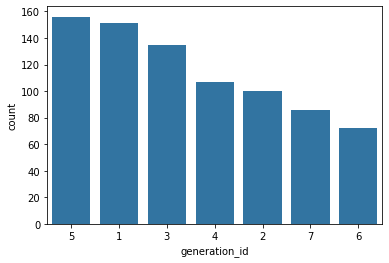

In [16]:
#generation_id looks numeric, but actually categorical labels, 
#indicating when introduced to series from 1st to 7th generation
sb.countplot(data = pokemon, x='generation_id', color=base_color,
            order=gen_order);
# could hard code order order=[5,1,3,4,2,7,6] better with value_counts()

In [14]:
base_color = sb.color_palette()[0]

In [15]:
gen_order = pokemon['generation_id'].value_counts().index

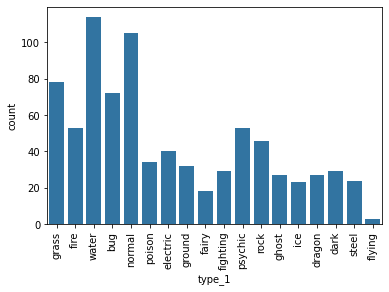

In [17]:
#looking at one of two types of pokemon: offensive vs defensive
sb.countplot(data=pokemon, x='type_1', color=base_color)
plt.xticks(rotation=90);

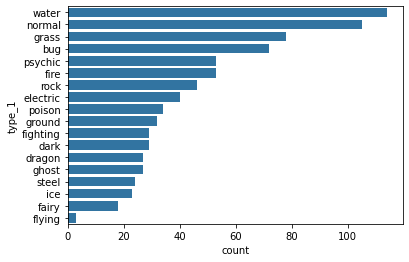

In [21]:
#horizontal bar chart: changing x to y:
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

In [20]:
type_order = pokemon['type_1'].value_counts().index

In [23]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                        value_vars = ['type_1', 'type_2'],
                        var_name = 'type_level', value_name='type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [24]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

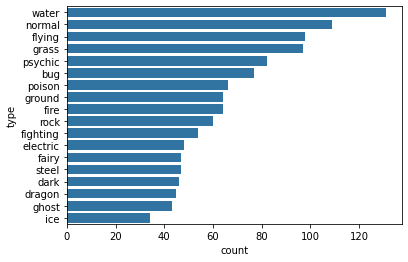

In [25]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y='type', color=base_color, order=type_order);

In [26]:
#what proportion of pokemon has each type? 
#create list of tick positions to replace absolute count
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)
#the original pokemon DF gives us the Denominator, and we use
#value_counts to get the Numerator

0.1623296158612144


In [27]:
#evenly spaced proportion values using numpy arange:
np.arange(0, max_prop, 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [28]:
tick_props = np.arange(0, max_prop, 0.02)
#list comprehension to show with consistent 2 decimal places:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

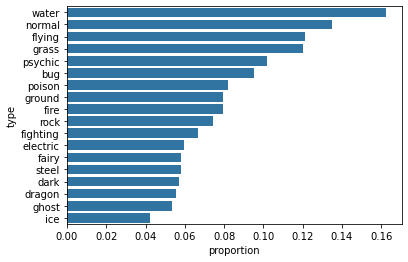

In [29]:
sb.countplot(data = pkmn_types, y='type', color=base_color, order=type_order)
#first argument sets the tick positions, counts are still in absolute value
#so multiply by n_pokemon to get position correct
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

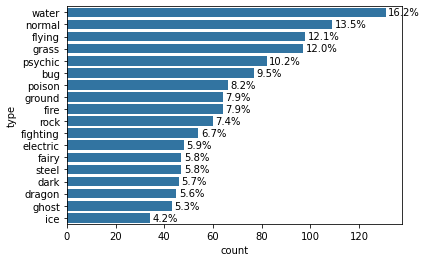

In [30]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y='type', color=base_color, order=type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i] #x position after bar
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    #y position, increments with loop
    plt.text(count+1, i, pct_string, va='center'); 